In [1]:
from typing import List
# suppress pandas future warning
import warnings
import pandas as pd

# run opentrons_simulate in the terminal and get the stdout
# and save it to a file

import os
import subprocess
import uuid
import shutil
import datetime
import glob
from typing import List, Tuple, Dict, Set, Optional, Union, Any, Callable, TypeVar, Generic, Type, cast, overload

warnings.filterwarnings("ignore", category=FutureWarning)

import openai
import pandas as pd
import tiktoken

from utils import init_df_eval, save_prompt_and_answer_with_modelname, extract_markdown_code_blocks, prepare_python_script, run_opentrons_simulate, check_filename_extract_model_info

In [2]:
dataset_path = "./question_and_answer"
df_eval = init_df_eval(dataset_path)
df_eval.head()

Found files: ['./question_and_answer\\v1\\chat_loop_1_77c26240-d6ae-4a94-8710-d4e8d1a1547b_gpt-4_token_100_temperature_0.9_2023-08-27-02-44-01_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_1_b7cbb7aa-d29f-4ea4-b9ab-0d687ae76bbd_gpt-3.5-turbo_token_100_temperature_0.9_2023-08-27-02-42-56_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_1_c6e4c955-ce3b-4447-bf02-78478552f3a4_gpt-4_token_100_temperature_0.9_2023-08-27-02-44-31_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_2_b7cbb7aa-d29f-4ea4-b9ab-0d687ae76bbd_gpt-3.5-turbo_token_100_temperature_0.9_2023-08-27-02-43-04_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_2_last_c6e4c955-ce3b-4447-bf02-78478552f3a4_gpt-4_token_100_temperature_0.9_2023-08-27-02-44-54_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_3_b7cbb7aa-d29f-4ea4-b9ab-0d687ae76bbd_gpt-3.5-turbo_token_100_temperature_0.9_2023-08-27-02-43-15_prompt_v1.txt', './question_and_answer\\v1\\chat_loop_4_last_b7cbb7aa-d29f-4ea4-b9ab-0d687ae76bbd_gpt-3

,model,finetuned,prompt_ver,opentrons_simulate_result,opentrons_simulate_result_last_line,opentrons_simulate_result_raw_text,opentrons_simulate_result_file_path,prompt_answer_file_path,python_script_file_path
0,,False,v1,,,,,./question_and_answer\v1\chat_loop_1_b7cbb7aa-...,
1,,False,v1,,,,,./question_and_answer\v1\chat_loop_2_b7cbb7aa-...,
2,,False,v1,,,,,./question_and_answer\v1\chat_loop_3_b7cbb7aa-...,
3,,False,v1,,,,,./question_and_answer\v1\chat_loop_4_last_b7cb...,
4,,False,v1,,,,,./question_and_answer\v1\chat_loop_1_77c26240-...,


In [3]:
def evaluate():
    """
    evaluate the answer text stored in `./question_and_answer/*.txt`
    run `opentrons_simulate` and save the result to the pandas dataframe
    """
    for row in df_eval.itertuples():
        file_path = row.prompt_answer_file_path
        filename = os.path.basename(file_path)
        model, finetuned, prompt_ver = check_filename_extract_model_info(filename)
        python_script_path = prepare_python_script(file_path, prompt_ver)
        output_path, output_text, result_type = run_opentrons_simulate(python_script_path, 'eva.txt')
        print(f'prompt_ver: {prompt_ver}, model: {model}, result_type: {result_type}')
        df_eval.at[row.Index, 'opentrons_simulate_result_file_path'] = output_path
        df_eval.at[row.Index, 'opentrons_simulate_result_raw_text'] = output_text
        df_eval.at[row.Index, 'opentrons_simulate_result_last_line'] = output_text.splitlines()[-1]
        df_eval.at[row.Index, 'opentrons_simulate_result'] = result_type
        df_eval.at[row.Index, 'model'] = model
        df_eval.at[row.Index, 'finetuned'] = finetuned
        df_eval.at[row.Index, 'prompt_ver'] = prompt_ver
        df_eval.at[row.Index, 'python_script_file_path'] = python_script_path
    # save df_eval
    df_eval.to_csv(dataset_path + '/df_eval.csv', index=False)

evaluate()

run subprocess, cmd: opentrons_simulate ./question_and_answer/v1/tmp/tmp_4812366b-fe60-4d04-81de-50213be6fb2c.py
CompletedProcess(args='opentrons_simulate ./question_and_answer/v1/tmp/tmp_4812366b-fe60-4d04-81de-50213be6fb2c.py', returncode=1, stdout='', stderr='Traceback (most recent call last):\n  File "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\runpy.py", line 196, in _run_module_as_main\n    return _run_code(code, main_globals, None,\n  File "C:\\Program Files\\WindowsApps\\PythonSoftwareFoundation.Python.3.10_3.10.3056.0_x64__qbz5n2kfra8p0\\lib\\runpy.py", line 86, in _run_code\n    exec(code, run_globals)\n  File "c:\\Users\\sv300\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\LocalCache\\local-packages\\Python310\\Scripts\\opentrons_simulate.exe\\__main__.py", line 7, in <module>\n  File "C:\\Users\\sv300\\AppData\\Local\\Packages\\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\\Lo

In [4]:
df_eval

,model,finetuned,prompt_ver,opentrons_simulate_result,opentrons_simulate_result_last_line,opentrons_simulate_result_raw_text,opentrons_simulate_result_file_path,prompt_answer_file_path,python_script_file_path
0,gpt-3.5-turbo_1,False,v1,error,RuntimeError: If this is not an API v1 protoco...,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_4812366b-fe60...
1,gpt-3.5-turbo_2,False,v1,error,opentrons.protocols.execution.errors.Exception...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_2_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_8fee3730-a660...
2,gpt-3.5-turbo_3,False,v1,error,,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_3_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_e2871297-6539...
3,gpt-3.5-turbo_4,False,v1,ok,Dropping tip into A1 of Opentrons Fixed Trash ...,Picking up tip from A1 of Opentrons 96 Tip Rac...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_4_last_b7cb...,./question_and_answer/v1/tmp/tmp_787f1937-55ca...
4,gpt-4_1,False,v1,error,opentrons_simulate: error: argument PROTOCOL: ...,"usage: opentrons_simulate [-h] [-l {debug,info...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_77c26240-...,None
5,gpt-4_1,False,v1,error,RuntimeError: If this is not an API v1 protoco...,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_c6e4c955-...,./question_and_answer/v1/tmp/tmp_255bb227-5d8b...
6,gpt-4_2,False,v1,ok,Dropping tip into A1 of Opentrons Fixed Trash ...,Picking up tip from A1 of Opentrons 96 Tip Rac...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_2_last_c6e4...,./question_and_answer/v1/tmp/tmp_d04ec38c-4b81...
7,gpt-3.5-turbo_1,False,v2,error,RuntimeError: Invalid target for multichannel ...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_1_847cfd84-...,./question_and_answer/v2/tmp/tmp_712d565e-4542...
8,gpt-3.5-turbo_2,False,v2,error,AttributeError: module 'opentrons.simulate' ha...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_2_847cfd84-...,./question_and_answer/v2/tmp/tmp_79ab6eb1-7876...
9,gpt-3.5-turbo_3,False,v2,error,AttributeError: module 'opentrons.simulate' ha...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_3_847cfd84-...,./question_and_answer/v2/tmp/tmp_08c46df1-28d2...


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

MODEL_LIST = [ 'ada', 'finetuned-davinci', 'code-davinci-002', 'text-davinci-003',
       'chatgpt', 'gpt-3.5-turbo', 'gpt-4', 'gpt-3.5-turbo_1', 'gpt-3.5-turbo_2', 'gpt-3.5-turbo_3',
       'gpt-3.5-turbo_4', 'gpt-3.5-turbo_5','gpt-4_1', 'gpt-4_2', 'gpt-4_3', 'gpt-4_4', 'gpt-4_5']

def add_error_kind(df_eval: pd.DataFrame):
    """
    Extract exceptions from `opentrons_simulate_result_raw_text` or `opentrons_simulate_result_last_line` column and add it to `error_kind` column
    # e.g. IndentaionError, NameError, etc.
    """
    # extract before ':'
    df_eval['error_kind'] = df_eval['opentrons_simulate_result_last_line'].str.extract(r'([a-zA-Z]+):')
    # if ExceptionInProtocolError, set error_kind to 'ExceptionInProtocolError'
    df_eval.loc[df_eval['opentrons_simulate_result_raw_text'].str.contains('ExceptionInProtocolError'), 'error_kind'] = 'ExceptionInProtocolError'
    # if ApiDeprecationError, set error_kind to 'ApiDeprecationError'
    df_eval.loc[df_eval['opentrons_simulate_result_raw_text'].str.contains('ApiDeprecationError'), 'error_kind'] = 'ApiDeprecationError'
    # MalformedProtocolError
    df_eval.loc[df_eval['opentrons_simulate_result_raw_text'].str.contains('MalformedProtocolError'), 'error_kind'] = 'MalformedProtocolError'
    # FileNotFoundError
    df_eval.loc[df_eval['opentrons_simulate_result_raw_text'].str.contains('FileNotFoundError'), 'error_kind'] = 'FileNotFoundError'
    # UnicodeDecodeError
    df_eval.loc[df_eval['opentrons_simulate_result_raw_text'].str.contains('UnicodeDecodeError'), 'error_kind'] = 'UnicodeDecodeError'
    # if error and opentrons_simulate_result_last_line is empty, add UnknownError
    df_eval.loc[(df_eval['opentrons_simulate_result'] == 'error') & ((df_eval['error_kind'] == '') | df_eval['error_kind'].isnull() | ~df_eval['error_kind'].isin(ERROR_LIST)), 'error_kind'] = 'UnknownError'
    # if opentrons_simulate_result == 'ok', set error_kind to 'success'
    df_eval.loc[df_eval['opentrons_simulate_result'] == 'ok', 'error_kind'] = 'success'
    return df_eval

def filter_prompt_ver(df_eval: pd.DataFrame, prompt_ver: List[str] = ['v1', 'v2']):
    return df_eval[df_eval['prompt_ver'].isin(prompt_ver)]

def plot_result(df_eval: pd.DataFrame, prompt_ver: str = 'v1'):
    df_eval = df_eval[df_eval['prompt_ver'] == prompt_ver]
    # sort by model name
    df_eval = df_eval.sort_values(by='model', key=lambda x: x.map(MODEL_LIST.index))
    # filter out 'chatgpt
    df_eval = df_eval[df_eval['model'] != 'chatgpt']
    if len(df_eval) == 0:
        print(f'no data for prompt_ver={prompt_ver}')
        return
    # plot

    base_palette = sns.color_palette("flare", len(ERROR_LIST))
    # color_palette = [base_palette[i] if key == 'success' else 'lightgreen' for i, key  in enumerate(ERROR_LIST) ]
    color_palette = {key: base_palette[i] if key != 'success' else 'lightgreen' for i, key  in enumerate(ERROR_LIST) }
    # {key: 'green' if key == 'success' else 'red' for key  in error_kind_list }
    # fontsize
    plt.rcParams['font.size'] = 18
    plt.figure(figsize=(20, 12))
    sns.countplot(x='model', hue='error_kind', data=df_eval, palette=color_palette)
    plt.title(f'result, prompt_ver={prompt_ver}')
    # rotate x labe not to overlap
    plt.xlabel(None)
    plt.xticks(rotation=60)
    # plt.show()
    plt.tight_layout()
    plt.savefig(f'./fig/result_prompt_ver_{prompt_ver}.pdf', dpi=300)

    # plot table
    plt.figure(figsize=(20, 12))
    sns.heatmap(pd.crosstab(df_eval['model'], df_eval['error_kind']), annot=True, fmt='d', cmap='Blues')
    plt.savefig(f'./fig/result_prompt_ver_{prompt_ver}_table.png', dpi=300)
    plt.title(f'result, prompt_ver={prompt_ver}')
    return



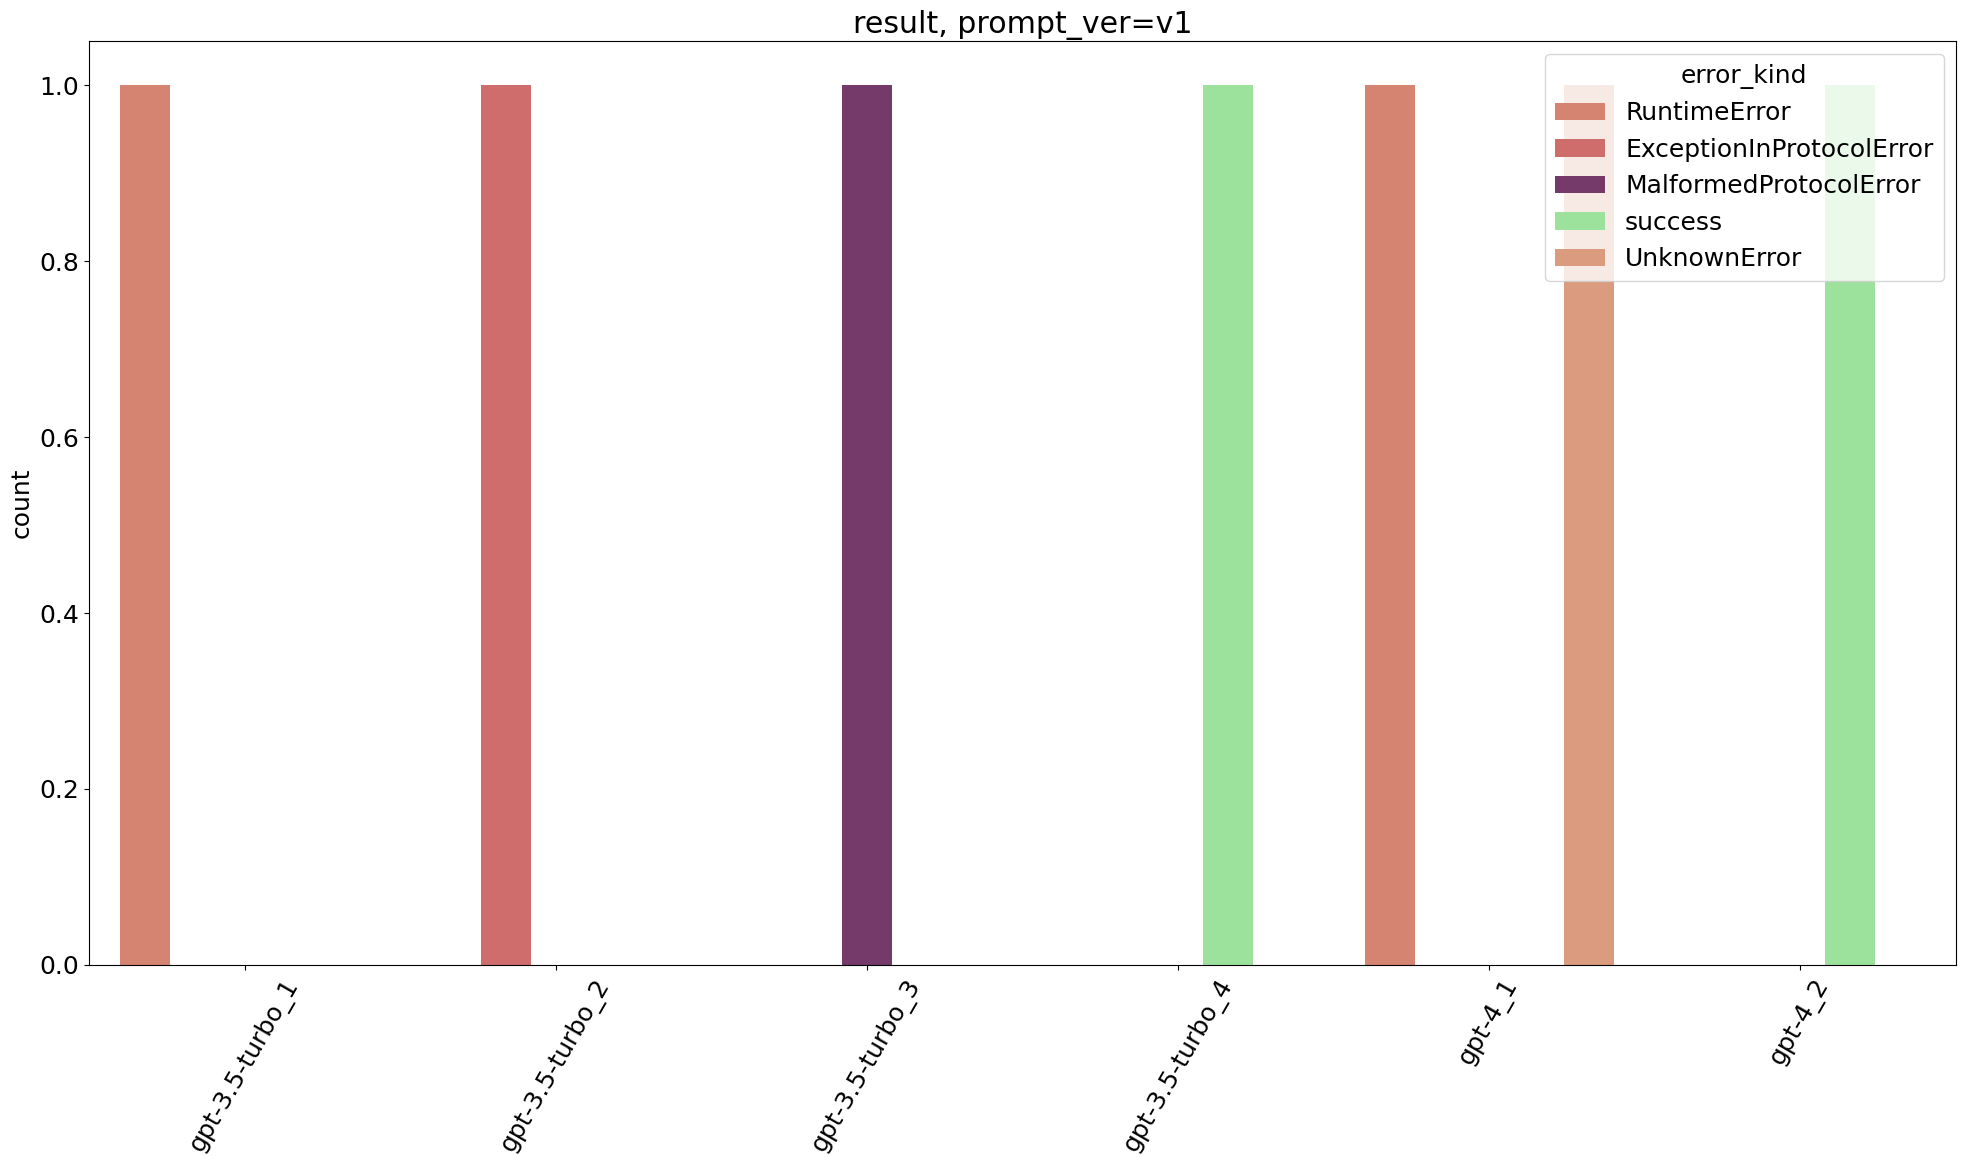

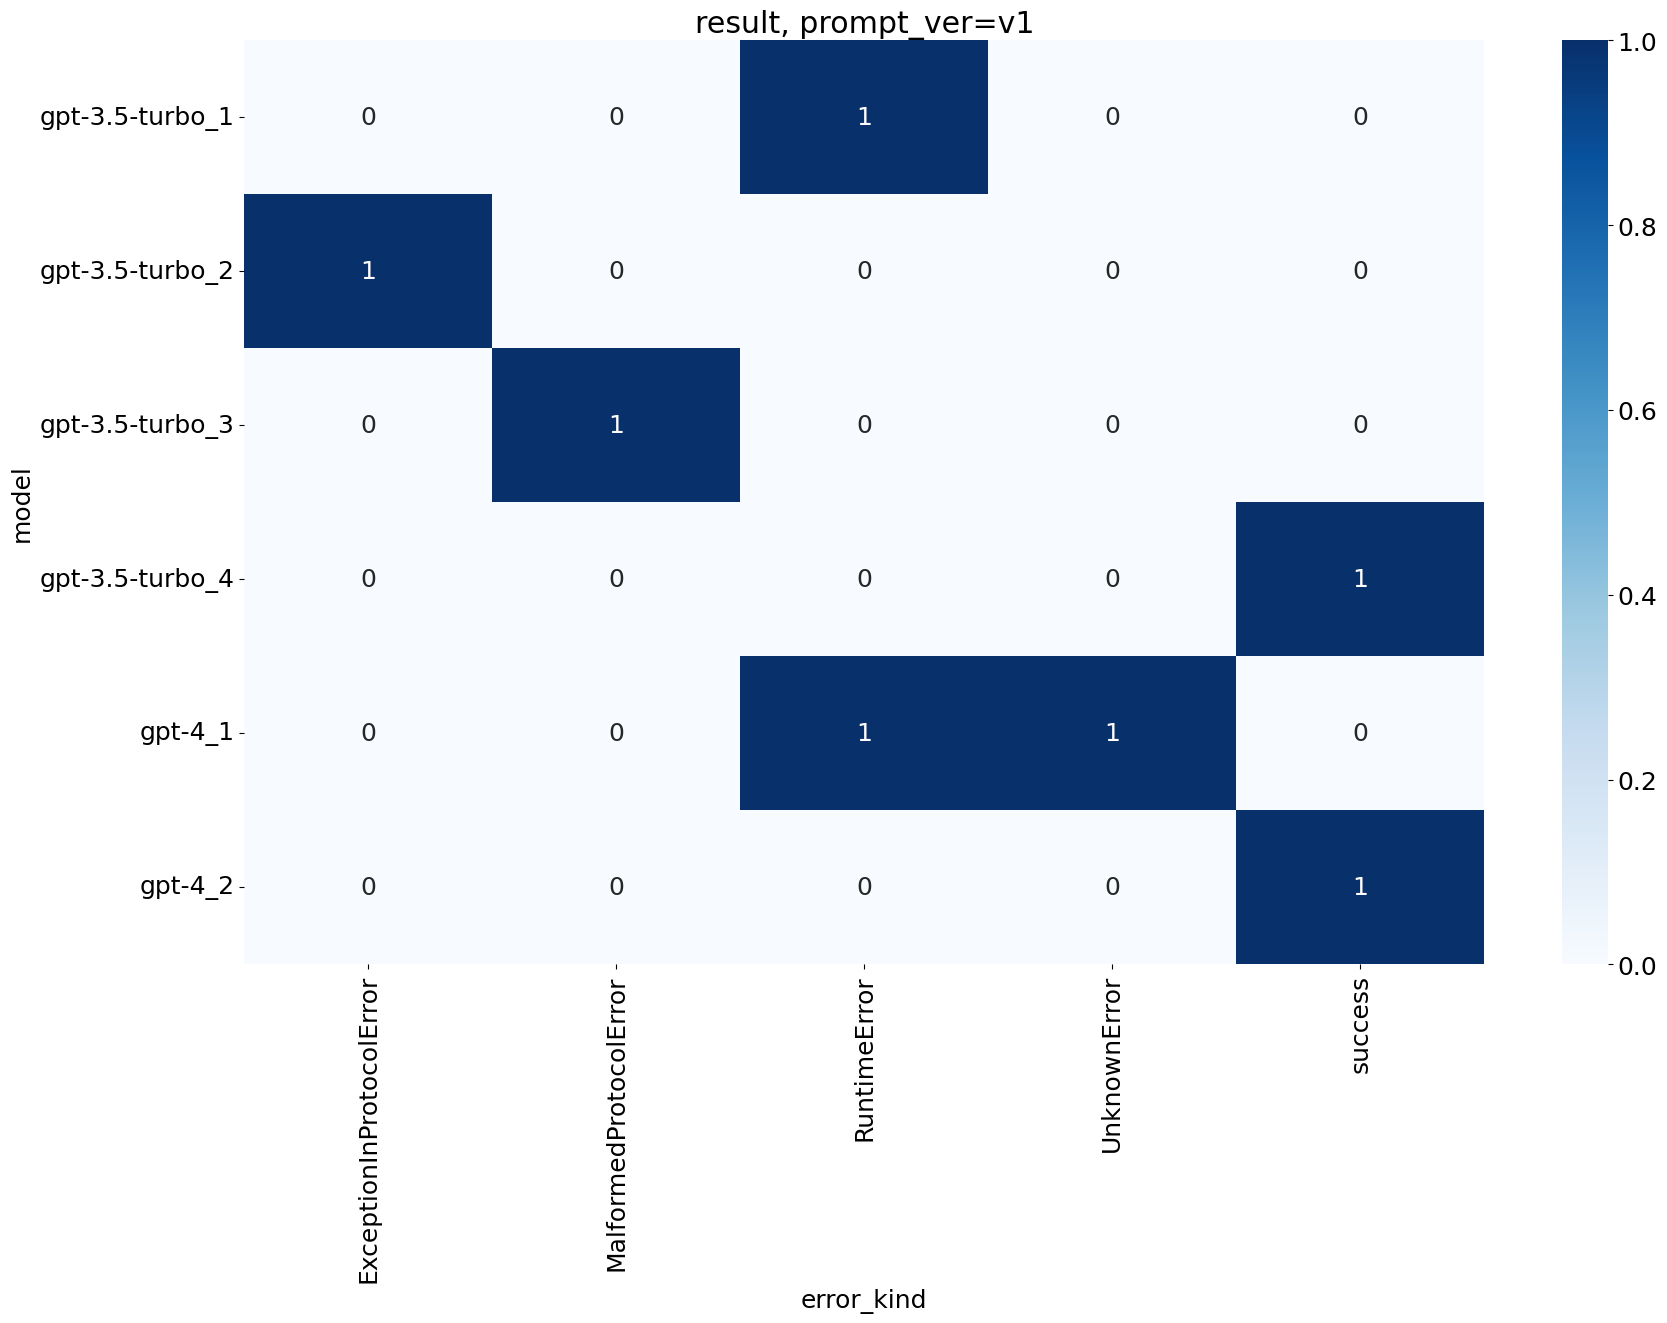

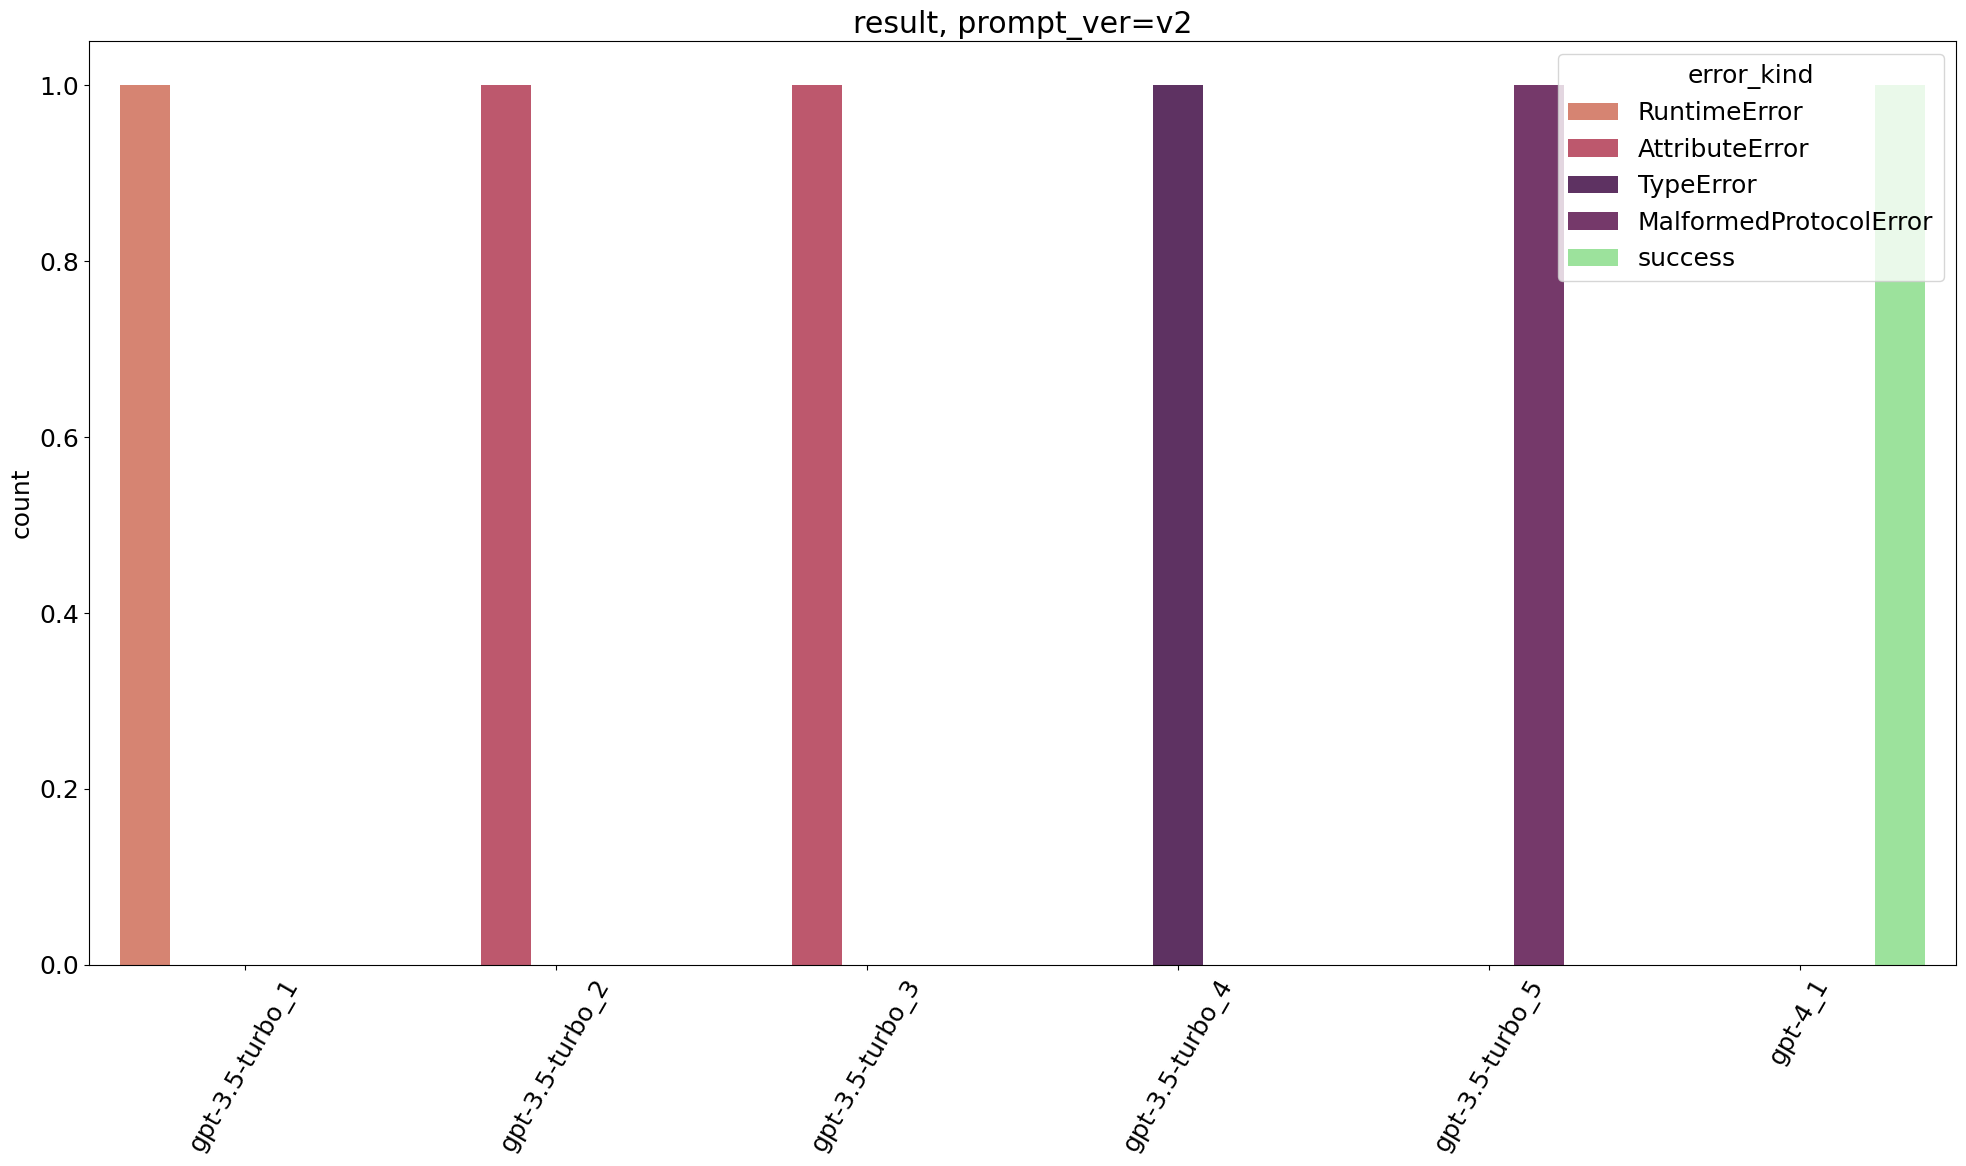

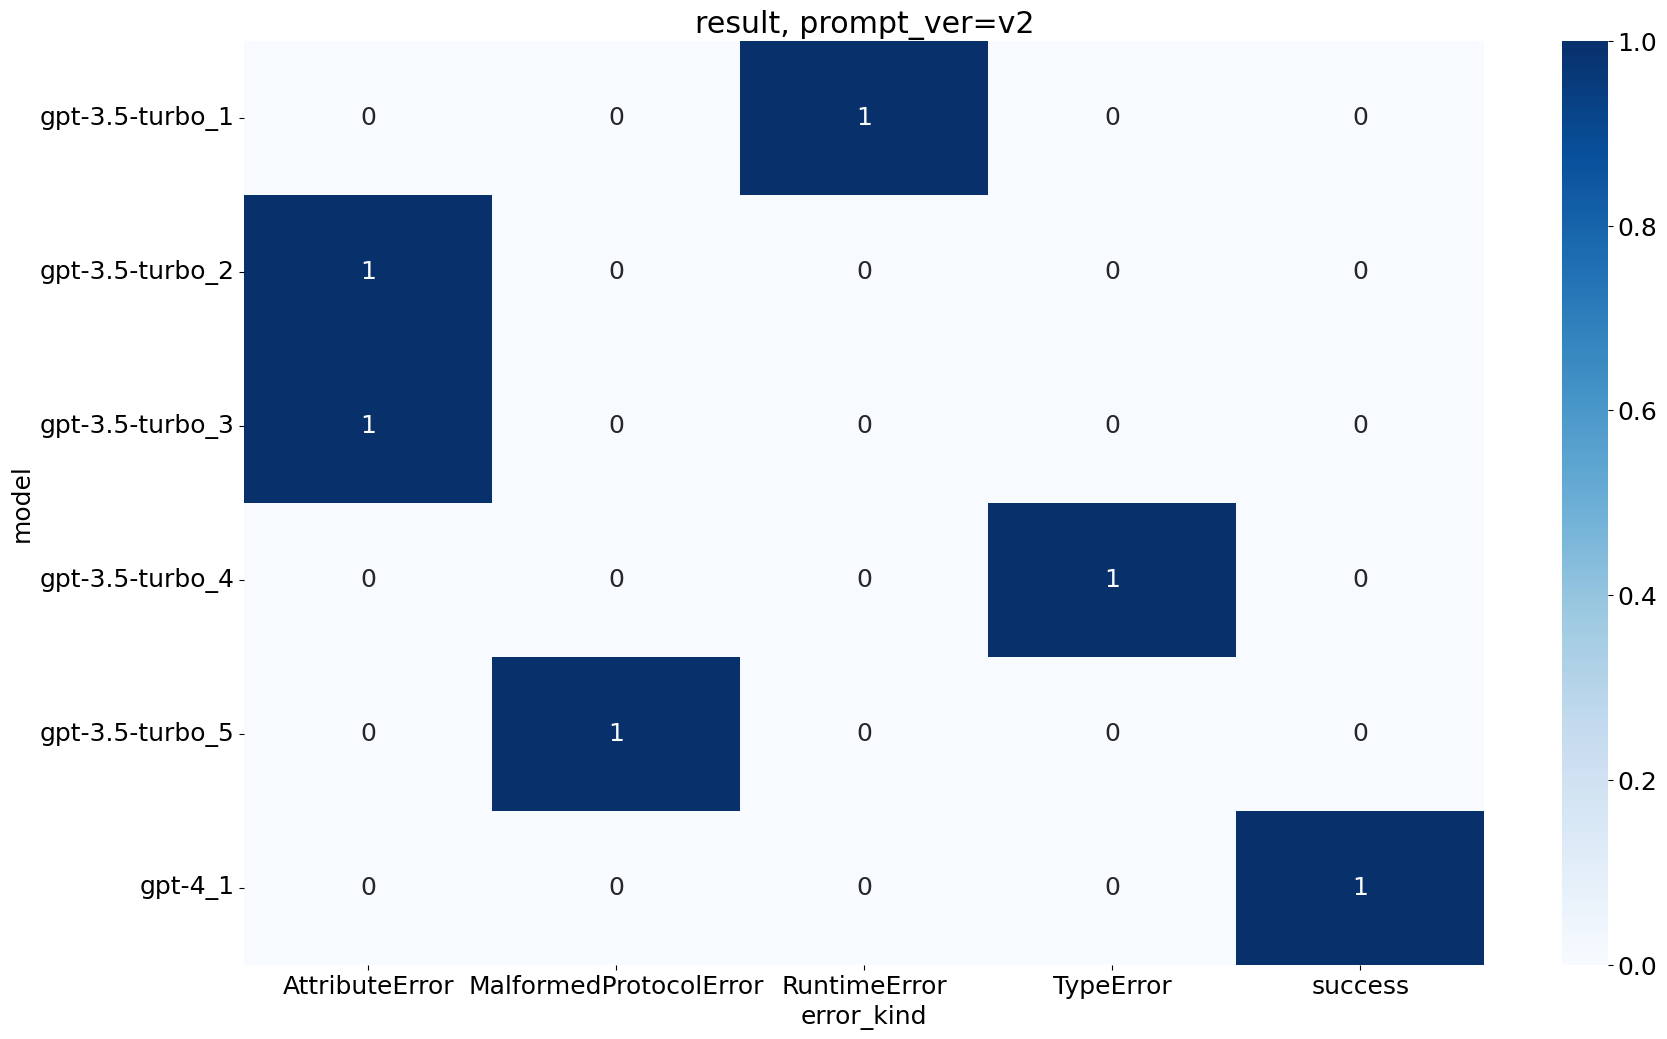

In [6]:
PROMPT_VAR_LIST = ['v1', 'v2', 'v3', 'v4', 'v3.1', 'v4.1']
UNIQUE_MODEL_LIST = ["gpt-4", "gpt-3.5-turbo", "ada", "text-davinci-003"]

ERROR_LIST = ['ApiDeprecationError', 'UnknownError', 'IndentationError', 'RuntimeError', 'SyntaxError', 'ExceptionInProtocolError', None, 'AttributeError', 'success', 'models', 'NameError', 'TabError', 'ValueError', 'MalformedProtocolError', 'FileNotFoundError', 'TypeError', 'UnicodeDecodeError']

USE_MODEL_LIST = ["gpt-4_1", "gpt-4_2", "gpt-4_3", "gpt-4_4", "gpt-4_5", "gpt-3.5-turbo_1", "gpt-3.5-turbo_2", "gpt-3.5-turbo_3", "gpt-3.5-turbo_4", "gpt-3.5-turbo_5"]
USE_MODEL_GROUP_LIST = ["gpt-4", "gpt-3.5-turbo"]
USE_COLUMNS = ['prompt_ver', 'model_group', 'error_kind', 'iteration', 'conversation_id']

# filter prompt version
#USE_PROMPT_VER = ['v1', 'v2', 'v3', 'v4']
#df_eval = filter_prompt_ver(df_eval, prompt_ver=USE_PROMPT_VER)

plot_result(add_error_kind(df_eval), prompt_ver='v1')
plot_result(add_error_kind(df_eval), prompt_ver='v2')



# plot_result(add_error_kind(df_eval), prompt_ver='v3')
# plot_result(add_error_kind(df_eval), prompt_ver='v4')


df_eval = add_error_kind(df_eval)

In [7]:
df_eval

,model,finetuned,prompt_ver,opentrons_simulate_result,opentrons_simulate_result_last_line,opentrons_simulate_result_raw_text,opentrons_simulate_result_file_path,prompt_answer_file_path,python_script_file_path,error_kind
0,gpt-3.5-turbo_1,False,v1,error,RuntimeError: If this is not an API v1 protoco...,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_4812366b-fe60...,RuntimeError
1,gpt-3.5-turbo_2,False,v1,error,opentrons.protocols.execution.errors.Exception...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_2_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_8fee3730-a660...,ExceptionInProtocolError
2,gpt-3.5-turbo_3,False,v1,error,,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_3_b7cbb7aa-...,./question_and_answer/v1/tmp/tmp_e2871297-6539...,MalformedProtocolError
3,gpt-3.5-turbo_4,False,v1,ok,Dropping tip into A1 of Opentrons Fixed Trash ...,Picking up tip from A1 of Opentrons 96 Tip Rac...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_4_last_b7cb...,./question_and_answer/v1/tmp/tmp_787f1937-55ca...,success
4,gpt-4_1,False,v1,error,opentrons_simulate: error: argument PROTOCOL: ...,"usage: opentrons_simulate [-h] [-l {debug,info...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_77c26240-...,None,UnknownError
5,gpt-4_1,False,v1,error,RuntimeError: If this is not an API v1 protoco...,"Traceback (most recent call last):\n File ""C:...",./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_1_c6e4c955-...,./question_and_answer/v1/tmp/tmp_255bb227-5d8b...,RuntimeError
6,gpt-4_2,False,v1,ok,Dropping tip into A1 of Opentrons Fixed Trash ...,Picking up tip from A1 of Opentrons 96 Tip Rac...,./question_and_answer/eval/eva.txt,./question_and_answer\v1\chat_loop_2_last_c6e4...,./question_and_answer/v1/tmp/tmp_d04ec38c-4b81...,success
7,gpt-3.5-turbo_1,False,v2,error,RuntimeError: Invalid target for multichannel ...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_1_847cfd84-...,./question_and_answer/v2/tmp/tmp_712d565e-4542...,RuntimeError
8,gpt-3.5-turbo_2,False,v2,error,AttributeError: module 'opentrons.simulate' ha...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_2_847cfd84-...,./question_and_answer/v2/tmp/tmp_79ab6eb1-7876...,AttributeError
9,gpt-3.5-turbo_3,False,v2,error,AttributeError: module 'opentrons.simulate' ha...,C:\Users\sv300\.opentrons\robot_settings.json ...,./question_and_answer/eval/eva.txt,./question_and_answer\v2\chat_loop_3_847cfd84-...,./question_and_answer/v2/tmp/tmp_08c46df1-28d2...,AttributeError


In [8]:
list(df_eval.error_kind.unique())

['RuntimeError',
 'ExceptionInProtocolError',
 'MalformedProtocolError',
 'success',
 'UnknownError',
 'AttributeError',
 'TypeError',
 'UnicodeDecodeError',
 'FileNotFoundError',
 'ApiDeprecationError',
 'NameError',
 'SyntaxError']

In [9]:
def add_conversation_id(df_eval: pd.DataFrame) -> pd.DataFrame:
    """
    Add conversation_id to each row. This is generated inside `call_evaluate_loop` function and is used to identify the conversation.

    treat some conversational models as one model, for example, gpt-4_1, gpt-4_2, gpt-4_3, gpt-4_4, gpt-4_5 as gpt-4
    but extract the number of the last underscore, for example, gpt-4_5 -> 5

    E.g.
        | model (str) | prompt_ver (str) | success | error_kind | model_group (str) | count (int) | conversation_id (uuid)
        | --- | --- | --- | --- | --- | --- | --- |
        | gpt-4_1 | v1 | 0 | 0 | gpt-4 | 1 | uuid |
        | gpt-4_2 | v1 | 0 | 0 | gpt-4 | 2 | uuid |
        | gpt-4_3 | v1 | 0 | 0 | gpt-4 | 3 | uuid |
    """
    for row in df_eval.itertuples():
        # extract the number of the last underscore
        count = row.model.split('_')[-1]
        # if count is digit, treat the model as one model
        if count.isdigit():
            df_eval.loc[row.Index, 'model_group'] = row.model.replace(f'_{count}', '')
            df_eval.loc[row.Index, 'iteration'] = int(count)
            # extract uuid from 
            filename = df_eval.loc[row.Index, 'prompt_answer_file_path'].split('/')[-1] # chat_loop_1_2c2cef27-69dc-401c-a8af-01bbb295e342_gpt-4_token_100_temperature_0.9_2023-03-27-14-46-47_prompt_v4
            df_eval.loc[row.Index, 'conversation_id'] = filename.split('_')[3]
            if filename.split('_')[3] == 'last':
                df_eval.loc[row.Index, 'conversation_id'] = filename.split('_')[4]
        else:
            df_eval.loc[row.Index, 'model_group'] = row.model
            df_eval.loc[row.Index, 'iteration'] = 0
            df_eval.loc[row.Index, 'conversation_id'] = ''
    return df_eval

df_eval_conversation = add_conversation_id(df_eval)

In [17]:
def use_some_columns(df_eval: pd.DataFrame):
    """
    Just ignore some columns that are not needed for plotting or table.
    """
    df = df_eval[USE_COLUMNS]
    # filter by USE_MODEL_LIST
    df = df[df['model_group'].isin(USE_MODEL_GROUP_LIST)]
    # iteration to int
    df['iteration'] = df['iteration'].astype(int)
    # filer iteration zero
    df = df[df['iteration'] != 0]
    return df

df_eval_short = use_some_columns(df_eval_conversation)
df_eval_short.head(40)

,prompt_ver,model_group,error_kind,iteration,conversation_id
0,v1,gpt-3.5-turbo,RuntimeError,1,loop
1,v1,gpt-3.5-turbo,ExceptionInProtocolError,2,loop
2,v1,gpt-3.5-turbo,MalformedProtocolError,3,loop
3,v1,gpt-3.5-turbo,success,4,loop
4,v1,gpt-4,UnknownError,1,loop
5,v1,gpt-4,RuntimeError,1,loop
6,v1,gpt-4,success,2,loop
7,v2,gpt-3.5-turbo,RuntimeError,1,loop
8,v2,gpt-3.5-turbo,AttributeError,2,loop
9,v2,gpt-3.5-turbo,AttributeError,3,loop


In [11]:
def format_dataframe(df: pd.DataFrame, model: str, prompt_ver: str) -> Tuple[pd.DataFrame, list]:
    """
    To create raw data table for the paper.
    """
    # use gpt-4 only
    df = df[df['model_group'] == model]
    # use v1 only
    df = df[df['prompt_ver'] == prompt_ver]
    grouped_db = df.groupby(['conversation_id', 'iteration']).error_kind.apply(list).reset_index()

    result_df = pd.DataFrame(columns=['Model', 'Prompt', 'Sample No.', 'conversation_id', '1', '2', '3', '4', '5'])
    result_df.loc[0] = ['Model', 'Prompt', 'Sample No.', 'conversation_id',  '1', '2', '3', '4', '5']

    results = []
    sample_no = 1
    if grouped_db.empty:
        return result_df, []
    current_conversation_id = grouped_db['conversation_id'][0]
    print(f'unique conversation id length: {len(grouped_db["conversation_id"].unique())}')
    for index, row in grouped_db.iterrows():
        if row['conversation_id'] != current_conversation_id:
            current_conversation_id = row['conversation_id']
            sample_no += 1

        row_data = [f'{model}', f'{prompt_ver}', str(sample_no), current_conversation_id]

        for i in range(1, 6):
            if row['iteration'] == i:
                row_data.append(row['error_kind'])
            else:
                row_data.append('')

        # append row
        result_df.loc[len(result_df)] = [*row_data]
        # result_df.loc[sample_no] = [*row_data]
        results.append(row_data)

    df_grouped = result_df.groupby(['Sample No.', 'Model', 'Prompt', 'conversation_id']).agg({str(i): lambda x: x.dropna().tolist() for i in range(1, 6)})
    result_df = result_df[['Sample No.', 'Model', 'Prompt', 'conversation_id']].drop_duplicates().merge(df_grouped.reset_index(), on='Sample No.')
    # drop ['Model_y', 'Prompt_y'] and  then rename ['Model_x', 'Prompt_x'] to ['Model', 'Prompt']
    result_df = result_df.drop(['Model_y', 'Prompt_y'], axis=1).rename(columns={'Model_x': 'Model', 'Prompt_x': 'Prompt'})
    # for [1, 2, 3, 4, 5] columns, convert list to string
    for i in range(1, 6):
        result_df[str(i)] = result_df[str(i)].apply(lambda x: str(x).replace('[', '').replace(']', '').replace("'", ''))
        # also, replace ', ' to ''
        result_df[str(i)] = result_df[str(i)].apply(lambda x: x.replace(', ', ''))
    # drop first row
    result_df = result_df.drop(result_df.index[0])

    # save csv
    result_df.to_csv(f'./table/all_{model}_{prompt_ver}.csv', index=False)
    return result_df, results


# Assuming you have the DataFrame named 'df_eval_short'
# Replace 'df_eval_short' with the actual DataFrame name if it's different
df_format_gpt4_v1, aa_tmp_list = format_dataframe(df_eval_short, 'gpt-4', 'v1')
df_format_gpt4_v2, _ = format_dataframe(df_eval_short, 'gpt-4', 'v2')
df_format_gpt3_5_v1, _ = format_dataframe(df_eval_short, 'gpt-3.5-turbo', 'v1')
df_format_gpt3_5_v2, _ = format_dataframe(df_eval_short, 'gpt-3.5-turbo', 'v2')

# concat and save csv
df_format = pd.concat([df_format_gpt4_v1, df_format_gpt4_v2, df_format_gpt3_5_v1, df_format_gpt3_5_v2])
df_format.to_csv('./table/all.csv', index=False)

# Print the resulting DataFrame
print(df_format)

unique conversation id length: 1
unique conversation id length: 1
unique conversation id length: 1
unique conversation id length: 1
  Sample No.          Model Prompt conversation_id_x conversation_id_y  \
1          1          gpt-4     v1              loop              loop   
1          1          gpt-4     v2              loop              loop   
1          1  gpt-3.5-turbo     v1              loop              loop   
1          1  gpt-3.5-turbo     v2              loop              loop   

                          1                         2                       3  \
1  UnknownErrorRuntimeError                   success                           
1                   success                                                     
1              RuntimeError  ExceptionInProtocolError  MalformedProtocolError   
1              RuntimeError            AttributeError          AttributeError   

           4                       5  
1                                     
1            

In [12]:
print(df_format)

  Sample No.          Model Prompt conversation_id_x conversation_id_y  \
1          1          gpt-4     v1              loop              loop   
1          1          gpt-4     v2              loop              loop   
1          1  gpt-3.5-turbo     v1              loop              loop   
1          1  gpt-3.5-turbo     v2              loop              loop   

                          1                         2                       3  \
1  UnknownErrorRuntimeError                   success                           
1                   success                                                     
1              RuntimeError  ExceptionInProtocolError  MalformedProtocolError   
1              RuntimeError            AttributeError          AttributeError   

           4                       5  
1                                     
1                                     
1    success                          
1  TypeError  MalformedProtocolError  
